In [115]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [116]:
# df = pd.read_table('Data_28_F29.txt', delimiter=',')
df = pd.read_csv('cotton_data_00.csv')

In [117]:
# columns = ['AVGYLD','ELE','SLOPE','CURV', 'PRO','PLAN','EC_SH','EC_DP','BAND1','BAND2','BAND3','BAND4',
#            'VI00_520','VI00_528','VI00_613','VI00_707','VI00_715','VI00_723','VI00_816','VI00_824','VI00_901','VI00_917',
#            'VI01_616','VI01_624','VI01_710','VI01_827','VI01_912','VI02_518','VI02_526','VI02_619',
#            'VI02_713','VI02_721','VI02_830','VI02_907','VI02_923','VI03_505','VI03_529','VI03_606',
#            'VI03_622','VI03_724','VI03_825','VI03_926']

In [118]:
df_use = df
df_use.head()

,YLD00,ELE,SLOPE,CURV,PRO,PLAN,EC_SH,EC_DP,BAND1,BAND2,...,VI00_520,VI00_528,VI00_613,VI00_707,VI00_715,VI00_723,VI00_816,VI00_824,VI00_901,VI00_917
0,1012.799988,1080.06,0.0879,0.002694,-0.001178,0.001515,14.4,38.700001,96,84,...,-0.2174,-0.1848,-0.1341,0.1712,0.2242,0.3089,0.1748,0.2216,0.1667,-0.0435
1,930.000000,1080.08,0.0575,0.001403,-0.000473,0.000930,14.3,40.900002,94,91,...,-0.2082,-0.1802,-0.1742,0.1378,0.2486,0.3505,0.3377,0.3368,0.2500,-0.0192
2,902.000000,1080.10,0.0906,-0.004624,0.004098,-0.000527,13.9,36.900002,92,92,...,-0.2014,-0.1802,-0.1625,0.1416,0.2697,0.3571,0.4125,0.3069,0.2500,-0.0099
3,931.900024,1080.13,0.1291,-0.001335,0.001011,-0.000324,14.1,37.099998,96,89,...,-0.2041,-0.1826,-0.1500,0.1217,0.2849,0.3776,0.4750,0.4020,0.2270,-0.0246
4,885.000000,1080.18,0.1515,0.002538,-0.001229,0.001309,14.8,36.099998,96,89,...,-0.2081,-0.1810,-0.1553,0.1121,0.2737,0.3604,0.4717,0.4257,0.1976,-0.0099


In [119]:
df_use.columns.values

array(['YLD00', 'ELE', 'SLOPE', 'CURV', 'PRO', 'PLAN', 'EC_SH', 'EC_DP',
       'BAND1', 'BAND2', 'BAND3', 'BAND4', 'VI00_520', 'VI00_528',
       'VI00_613', 'VI00_707', 'VI00_715', 'VI00_723', 'VI00_816',
       'VI00_824', 'VI00_901', 'VI00_917'], dtype=object)

In [120]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import scikitplot as skplt

def compute_score(clf, X, y, scoring='mean_squared_error'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

def plot_roc(x_test, y_test, model):
    predicted_probas = model.predict_proba(x_test)
    skplt.metrics.plot_roc(y_test, predicted_probas, figsize =(10,10))
    plt.show()
    
def yld_category(yld):
    if yld <= 603:
        return 1
    elif 603 < yld <= 766:
        return 2
    elif 766 < yld <= 882:
        return 3
    elif 882 < yld <= 956:
        return 4
    elif 956 < yld <= 1018:
        return 5
    elif 1018 < yld <= 1075:
        return 6
    elif 1075 < yld <= 1134:
        return 7
    elif 1134 < yld <= 1200:
        return 8
    elif 1200 < yld <= 1280:
        return 9
    elif yld > 1280:
        return 10

In [121]:
full = df_use
full['AVGYLD_Category'] = full['YLD00'].apply(lambda x: yld_category(x))

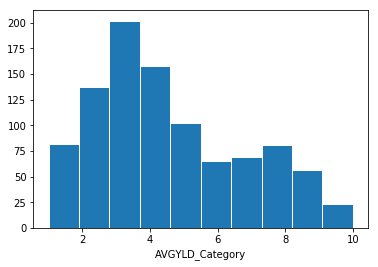

In [140]:
sns.distplot(full['AVGYLD_Category'], kde=False, bins=10, hist_kws={'edgecolor':'white', 'alpha':1.0})

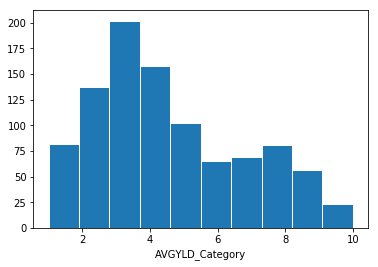

In [137]:
sns.distplot(full['AVGYLD_Category'], kde=False, bins=10, hist_kws={"rwidth":1,'edgecolor':'white', 'alpha':1.0})

In [92]:
tmp = []

for i in range(1, 11):
    tmp.append(full[full['AVGYLD_Category'] == i])

In [93]:
X_train = []
X_test = []
y_train = []
y_test = []
X_cols = [col for col in full.columns if col not in ['YLD00', 'AVGYLD_Category']]
X = []
y = []


for i in range(10):
    X.append(tmp[i][X_cols])
    y.append(tmp[i]['YLD00'])
    X_train_part, X_test_part, y_train_part, y_test_part = train_test_split(tmp[i][X_cols], tmp[i]['YLD00'], test_size=.2,random_state=0)
    X_train.append(X_train_part)
    X_test.append(X_test_part)
    y_train.append(y_train_part)
    y_test.append(y_test_part)

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(full[X_cols], full['YLD00'], test_size=.2,random_state=0)


X.append(full[X_cols])
y.append(full['YLD00'])
X_train.append(X_train_full)
X_test.append(X_test_full)
y_train.append(y_train_full)
y_test.append(y_test_full)



## dt

In [94]:
warnings.filterwarnings('ignore')
dt_tune_run = True
dt_parameters = []

for i in range(11):
    print(i)
    defaut = {'criterion': 'mse', 'max_depth': None,
                  'max_leaf_nodes': None, 'min_impurity_split': 0.005, 'min_weight_fraction_leaf': 0.0,
              'presort': False, 'splitter': 'random'}
    dt_parameters.append(defaut)
    if dt_tune_run:
        parameter_grid = {
    #          'max_features':range(0,1,1),
            'random_state':range(0,10,1),
            'min_samples_leaf':range(1,10,1),
            'min_samples_split': range(2, 20, 1)
        }
        forest = DecisionTreeRegressor(criterion='mse', max_depth=None,
                                        max_leaf_nodes=None,
                                        min_impurity_split=0.005, min_weight_fraction_leaf=0.0,
                                        presort=False, splitter='random')

        grid_search = GridSearchCV(forest,
                                   scoring='mean_squared_error',
                                   param_grid=parameter_grid,
                                   cv=5)

        grid_search.fit(X[i], y[i])
        DecisionTreeModel = grid_search
        parameters = grid_search.best_params_
        dt_parameters[i]['min_samples_leaf'] = grid_search.best_params_['min_samples_leaf']
        dt_parameters[i]['min_samples_split'] = grid_search.best_params_['min_samples_split']
        dt_parameters[i]['random_state'] = grid_search.best_params_['random_state']
        print('Best score: {}'.format(grid_search.best_score_))
        print('Best parameters: {}'.format(grid_search.best_params_))

0
Best score: -6113.919917122458
Best parameters: {'min_samples_leaf': 2, 'min_samples_split': 10, 'random_state': 8}
1
Best score: -1962.409395937711
Best parameters: {'min_samples_leaf': 8, 'min_samples_split': 2, 'random_state': 6}
2
Best score: -1252.4691846200042
Best parameters: {'min_samples_leaf': 7, 'min_samples_split': 19, 'random_state': 4}
3
Best score: -433.528052286799
Best parameters: {'min_samples_leaf': 7, 'min_samples_split': 18, 'random_state': 8}
4
Best score: -322.9236116362546
Best parameters: {'min_samples_leaf': 5, 'min_samples_split': 2, 'random_state': 9}
5
Best score: -310.89519594832694
Best parameters: {'min_samples_leaf': 9, 'min_samples_split': 19, 'random_state': 8}
6
Best score: -265.08603646730216
Best parameters: {'min_samples_leaf': 8, 'min_samples_split': 2, 'random_state': 7}
7
Best score: -398.5835972022729
Best parameters: {'min_samples_leaf': 8, 'min_samples_split': 18, 'random_state': 1}
8
Best score: -414.19325665876903
Best parameters: {'min_

In [95]:
warnings.filterwarnings('ignore')
score_measure_list = ['neg_mean_absolute_error', 'neg_mean_squared_error']
dt_model = []

for i in range(11):
    tmp_model = DecisionTreeRegressor(**dt_parameters[i])
    tmp_model.fit(X_train[i], y_train[i])
    dt_model.append(tmp_model)

for i in range(11):
    print(i)
    for score_measure in score_measure_list:
        res = compute_score(dt_model[i], X[i], y[i], scoring = score_measure)
        res = round(res, 2) * -1
        if score_measure == 'neg_mean_absolute_error':
            print('Model: dt range - {}, measure: mae, score: {}'.format(i+1, res))
        elif score_measure == 'neg_mean_squared_error':
            print('Model: dt range - {} measure: mse, score: {}'.format(i+1, res))
            tmp = round(res ** 0.5, 2)
            print('Model: dt range - {} measure: rmse, score: {}'.format(i+1, tmp))

0
Model: dt range - 1, measure: mae, score: 58.94
Model: dt range - 1 measure: mse, score: 6165.48
Model: dt range - 1 measure: rmse, score: 78.52
1
Model: dt range - 2, measure: mae, score: 35.86
Model: dt range - 2 measure: mse, score: 1965.23
Model: dt range - 2 measure: rmse, score: 44.33
2
Model: dt range - 3, measure: mae, score: 29.8
Model: dt range - 3 measure: mse, score: 1253.2
Model: dt range - 3 measure: rmse, score: 35.4
3
Model: dt range - 4, measure: mae, score: 17.27
Model: dt range - 4 measure: mse, score: 434.36
Model: dt range - 4 measure: rmse, score: 20.84
4
Model: dt range - 5, measure: mae, score: 14.84
Model: dt range - 5 measure: mse, score: 323.9
Model: dt range - 5 measure: rmse, score: 18.0
5
Model: dt range - 6, measure: mae, score: 15.29
Model: dt range - 6 measure: mse, score: 310.9
Model: dt range - 6 measure: rmse, score: 17.63
6
Model: dt range - 7, measure: mae, score: 13.57
Model: dt range - 7 measure: mse, score: 265.78
Model: dt range - 7 measure: 

In [96]:
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def me(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)

    return max(np.abs(y_true - y_pred))

In [98]:

for i in range(11):
    print(i)
    y_pred = dt_model[i].predict(X_test[i])
    mape_res = round(mape(y_test[i], y_pred),2)
    print('Model: dt range - {}, measure: mape, score: {}'.format(i+1, mape_res))
    me_res = round(me(y_test[i], y_pred),2)
    print('Model: dt range - {}, measure: me, score: {}'.format(i+1, me_res))

0
Model: dt range - 1, measure: mape, score: 12.36
Model: dt range - 1, measure: me, score: 114.26
1
Model: dt range - 2, measure: mape, score: 5.64
Model: dt range - 2, measure: me, score: 118.39
2
Model: dt range - 3, measure: mape, score: 3.77
Model: dt range - 3, measure: me, score: 63.53
3
Model: dt range - 4, measure: mape, score: 2.45
Model: dt range - 4, measure: me, score: 49.6
4
Model: dt range - 5, measure: mape, score: 1.8
Model: dt range - 5, measure: me, score: 42.84
5
Model: dt range - 6, measure: mape, score: 1.44
Model: dt range - 6, measure: me, score: 33.6
6
Model: dt range - 7, measure: mape, score: 1.25
Model: dt range - 7, measure: me, score: 28.33
7
Model: dt range - 8, measure: mape, score: 1.73
Model: dt range - 8, measure: me, score: 39.75
8
Model: dt range - 9, measure: mape, score: 1.99
Model: dt range - 9, measure: me, score: 50.0
9
Model: dt range - 10, measure: mape, score: 5.37
Model: dt range - 10, measure: me, score: 211.38
10
Model: dt range - 11, mea

## svm

In [99]:
warnings.filterwarnings('ignore')
svm_tune_run = True
svm_parameters = []

for i in range(11):
    print(i)
    defaut = {'cache_size': 200, 'coef0': 0.0,
                  'degree': 3, 'kernel': 'rbf', 'max_iter': -1,
              'shrinking': True, 'tol': 0.001, 'verbose': False}
    svm_parameters.append(defaut)
    if svm_tune_run:
        parameter_grid = {
             'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'gamma' : [0.001, 0.01, 0.1, 1]
         }

        forest = SVR(cache_size=200, coef0=0.0,
                  degree=3, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

        grid_search = GridSearchCV(forest,
                                   scoring='mean_squared_error',
                                   param_grid=parameter_grid,
                                   cv=5)

        grid_search.fit(X[i], y[i])
        SVCModel = grid_search
        parameters = grid_search.best_params_
        svm_parameters[i]['C'] = grid_search.best_params_['C']
        svm_parameters[i]['gamma'] = grid_search.best_params_['gamma']

        print('Best score: {}'.format(grid_search.best_score_))
        print('Best parameters: {}'.format(grid_search.best_params_))

0
Best score: -7183.846027347191
Best parameters: {'C': 10, 'gamma': 0.001}
1
Best score: -1998.780910440363
Best parameters: {'C': 1000, 'gamma': 1}
2
Best score: -1192.6246235223898
Best parameters: {'C': 1, 'gamma': 0.01}
3
Best score: -416.20998268542183
Best parameters: {'C': 100, 'gamma': 1}
4
Best score: -331.49825151994287
Best parameters: {'C': 10, 'gamma': 0.01}
5
Best score: -295.78891517096145
Best parameters: {'C': 100, 'gamma': 1}
6
Best score: -265.8639146617706
Best parameters: {'C': 0.1, 'gamma': 0.001}
7
Best score: -401.95951893392817
Best parameters: {'C': 100, 'gamma': 1}
8
Best score: -518.4341398511824
Best parameters: {'C': 100, 'gamma': 0.1}
9
Best score: -3476.4054444069416
Best parameters: {'C': 100, 'gamma': 0.1}
10
Best score: -27923.225817188817
Best parameters: {'C': 1000, 'gamma': 0.001}


In [100]:
warnings.filterwarnings('ignore')
score_measure_list = ['neg_mean_absolute_error', 'neg_mean_squared_error']
svm_model = []

for i in range(11):
    tmp_model = SVR(**svm_parameters[i])
    tmp_model.fit(X_train[i], y_train[i])
    svm_model.append(tmp_model)

for i in range(11):
    print(i)
    for score_measure in score_measure_list:
        res = compute_score(svm_model[i], X[i], y[i], scoring = score_measure)
        res = round(res, 2) * -1
        if score_measure == 'neg_mean_absolute_error':
            print('Model: svm range - {}, measure: mae, score: {}'.format(i+1, res))
        elif score_measure == 'neg_mean_squared_error':
            print('Model: svm range - {} measure: mse, score: {}'.format(i+1, res))
            tmp = round(res ** 0.5, 2)
            print('Model: svm range - {} measure: rmse, score: {}'.format(i+1, tmp))

0
Model: svm range - 1, measure: mae, score: 68.26
Model: svm range - 1 measure: mse, score: 7182.14
Model: svm range - 1 measure: rmse, score: 84.75
1
Model: svm range - 2, measure: mae, score: 38.56
Model: svm range - 2 measure: mse, score: 1999.09
Model: svm range - 2 measure: rmse, score: 44.71
2
Model: svm range - 3, measure: mae, score: 30.18
Model: svm range - 3 measure: mse, score: 1192.6
Model: svm range - 3 measure: rmse, score: 34.53
3
Model: svm range - 4, measure: mae, score: 17.54
Model: svm range - 4 measure: mse, score: 416.29
Model: svm range - 4 measure: rmse, score: 20.4
4
Model: svm range - 5, measure: mae, score: 15.82
Model: svm range - 5 measure: mse, score: 331.9
Model: svm range - 5 measure: rmse, score: 18.22
5
Model: svm range - 6, measure: mae, score: 15.36
Model: svm range - 6 measure: mse, score: 295.79
Model: svm range - 6 measure: rmse, score: 17.2
6
Model: svm range - 7, measure: mae, score: 13.45
Model: svm range - 7 measure: mse, score: 265.75
Model: 

In [101]:

for i in range(11):
    print(i)
    y_pred = svm_model[i].predict(X_test[i])
    mape_res = round(mape(y_test[i], y_pred),2)
    print('Model: svm range - {}, measure: mape, score: {}'.format(i+1, mape_res))
    me_res = round(me(y_test[i], y_pred),2)
    print('Model: svm range - {}, measure: me, score: {}'.format(i+1, me_res))

0
Model: svm range - 1, measure: mape, score: 16.65
Model: svm range - 1, measure: me, score: 234.43
1
Model: svm range - 2, measure: mape, score: 5.7
Model: svm range - 2, measure: me, score: 85.39
2
Model: svm range - 3, measure: mape, score: 3.97
Model: svm range - 3, measure: me, score: 60.76
3
Model: svm range - 4, measure: mape, score: 2.19
Model: svm range - 4, measure: me, score: 39.84
4
Model: svm range - 5, measure: mape, score: 1.47
Model: svm range - 5, measure: me, score: 36.73
5
Model: svm range - 6, measure: mape, score: 1.54
Model: svm range - 6, measure: me, score: 26.64
6
Model: svm range - 7, measure: mape, score: 1.0
Model: svm range - 7, measure: me, score: 28.64
7
Model: svm range - 8, measure: mape, score: 1.66
Model: svm range - 8, measure: me, score: 33.26
8
Model: svm range - 9, measure: mape, score: 1.84
Model: svm range - 9, measure: me, score: 50.79
9
Model: svm range - 10, measure: mape, score: 4.81
Model: svm range - 10, measure: me, score: 172.68
10
Mode

## random forest

In [102]:
warnings.filterwarnings('ignore')
rf_tune_run = True
rf_parameters = []

for i in range(11):
    print(i)
    defaut = {'criterion': 'mse', 'max_depth': None, 'max_leaf_nodes': None,
                      'min_impurity_split': 0.005, 'min_weight_fraction_leaf': 0.0}
    rf_parameters.append(defaut)
    if rf_tune_run:
        parameter_grid = {
    #          'max_features':range(0,1,1),
            'random_state':range(0,10,1),
            'min_samples_leaf':range(1,10,1),
            'min_samples_split': range(2, 20, 1)
        }

        forest = RandomForestRegressor(criterion='mse', max_depth=None,
                                    max_leaf_nodes=None,
                                    min_impurity_split=0.005, min_weight_fraction_leaf=0.0)

        grid_search = GridSearchCV(forest,
                                   scoring='mean_squared_error',
                                   param_grid=parameter_grid,
                                   cv=5)

        grid_search.fit(X[i], y[i])
        SVCModel = grid_search
        parameters = grid_search.best_params_
        rf_parameters[i]['random_state'] = grid_search.best_params_['random_state']
        rf_parameters[i]['min_samples_leaf'] = grid_search.best_params_['min_samples_leaf']
        rf_parameters[i]['min_samples_split'] = grid_search.best_params_['min_samples_split']

        print('Best score: {}'.format(grid_search.best_score_))
        print('Best parameters: {}'.format(grid_search.best_params_))

0
Best score: -6601.59494222541
Best parameters: {'min_samples_leaf': 7, 'min_samples_split': 2, 'random_state': 5}
1
Best score: -1745.4915095079257
Best parameters: {'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 2}
2
Best score: -1199.5482634657158
Best parameters: {'min_samples_leaf': 7, 'min_samples_split': 19, 'random_state': 2}
3
Best score: -425.7000188428697
Best parameters: {'min_samples_leaf': 8, 'min_samples_split': 19, 'random_state': 8}
4
Best score: -323.7623176776049
Best parameters: {'min_samples_leaf': 9, 'min_samples_split': 2, 'random_state': 4}
5
Best score: -326.4677848332351
Best parameters: {'min_samples_leaf': 9, 'min_samples_split': 19, 'random_state': 9}
6
Best score: -284.6219541480111
Best parameters: {'min_samples_leaf': 1, 'min_samples_split': 4, 'random_state': 9}
7
Best score: -399.91071107251906
Best parameters: {'min_samples_leaf': 7, 'min_samples_split': 15, 'random_state': 1}
8
Best score: -465.8777332306277
Best parameters: {'min_sa

In [103]:
warnings.filterwarnings('ignore')
score_measure_list = ['neg_mean_absolute_error', 'neg_mean_squared_error']
rf_model = []

for i in range(11):
    tmp_model = RandomForestRegressor(**rf_parameters[i])
    tmp_model.fit(X_train[i], y_train[i])
    rf_model.append(tmp_model)

for i in range(11):
    print(i)
    for score_measure in score_measure_list:
        res = compute_score(rf_model[i], X[i], y[i], scoring = score_measure)
        res = round(res, 2) * -1
        if score_measure == 'neg_mean_absolute_error':
            print('Model: rf range - {}, measure: mae, score: {}'.format(i+1, res))
        elif score_measure == 'neg_mean_squared_error':
            print('Model: rf range - {} measure: mse, score: {}'.format(i+1, res))
            tmp = round(res ** 0.5, 2)
            print('Model: rf range - {} measure: rmse, score: {}'.format(i+1, tmp))

0
Model: rf range - 1, measure: mae, score: 63.52
Model: rf range - 1 measure: mse, score: 6616.69
Model: rf range - 1 measure: rmse, score: 81.34
1
Model: rf range - 2, measure: mae, score: 34.54
Model: rf range - 2 measure: mse, score: 1745.91
Model: rf range - 2 measure: rmse, score: 41.78
2
Model: rf range - 3, measure: mae, score: 29.92
Model: rf range - 3 measure: mse, score: 1199.69
Model: rf range - 3 measure: rmse, score: 34.64
3
Model: rf range - 4, measure: mae, score: 17.25
Model: rf range - 4 measure: mse, score: 425.66
Model: rf range - 4 measure: rmse, score: 20.63
4
Model: rf range - 5, measure: mae, score: 15.85
Model: rf range - 5 measure: mse, score: 324.04
Model: rf range - 5 measure: rmse, score: 18.0
5
Model: rf range - 6, measure: mae, score: 15.71
Model: rf range - 6 measure: mse, score: 326.47
Model: rf range - 6 measure: rmse, score: 18.07
6
Model: rf range - 7, measure: mae, score: 14.2
Model: rf range - 7 measure: mse, score: 285.1
Model: rf range - 7 measur

In [104]:
for i in range(11):
    print(i)
    y_pred = rf_model[i].predict(X_test[i])
    mape_res = round(mape(y_test[i], y_pred),2)
    print('Model: rf range - {}, measure: mape, score: {}'.format(i+1, mape_res))
    me_res = round(me(y_test[i], y_pred),2)
    print('Model: rf range - {}, measure: me, score: {}'.format(i+1, me_res))

0
Model: rf range - 1, measure: mape, score: 13.82
Model: rf range - 1, measure: me, score: 209.39
1
Model: rf range - 2, measure: mape, score: 5.33
Model: rf range - 2, measure: me, score: 100.55
2
Model: rf range - 3, measure: mape, score: 3.93
Model: rf range - 3, measure: me, score: 65.87
3
Model: rf range - 4, measure: mape, score: 2.14
Model: rf range - 4, measure: me, score: 43.41
4
Model: rf range - 5, measure: mape, score: 1.62
Model: rf range - 5, measure: me, score: 34.74
5
Model: rf range - 6, measure: mape, score: 1.69
Model: rf range - 6, measure: me, score: 30.65
6
Model: rf range - 7, measure: mape, score: 1.25
Model: rf range - 7, measure: me, score: 31.73
7
Model: rf range - 8, measure: mape, score: 1.67
Model: rf range - 8, measure: me, score: 42.58
8
Model: rf range - 9, measure: mape, score: 1.78
Model: rf range - 9, measure: me, score: 43.2
9
Model: rf range - 10, measure: mape, score: 4.76
Model: rf range - 10, measure: me, score: 173.22
10
Model: rf range - 11, 

## xgboost

In [105]:
from xgboost import XGBRegressor
warnings.filterwarnings('ignore')

xgb_tune_run = True
xgb_parameters = []

for i in range(11):
    print(i)
    defaut = {'subsample': 0.8, 'colsample_bytree': 1.0, 'max_depth': 2, 'gamma': 0.3, 'min_child_weight': 4}
    xgb_parameters.append(defaut)
    if xgb_tune_run:
        parameter_grid = {
                    'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)], 
                    'subsample':[i/10.0 for i in range(6,11)],
                    'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4]
        }

        forest = XGBRegressor(nthread=-1)

        grid_search = GridSearchCV(forest,
                                   scoring='mean_squared_error',
                                   param_grid=parameter_grid,
                                   cv=5)

        grid_search.fit(X[i], y[i])
        SVCModel = grid_search
        parameters = grid_search.best_params_
        xgb_parameters[i]['min_child_weight'] = grid_search.best_params_['min_child_weight']
        xgb_parameters[i]['gamma'] = grid_search.best_params_['gamma']
        xgb_parameters[i]['subsample'] = grid_search.best_params_['subsample']
        xgb_parameters[i]['colsample_bytree'] = grid_search.best_params_['colsample_bytree']
        xgb_parameters[i]['max_depth'] = grid_search.best_params_['max_depth']
        
        print('Best score: {}'.format(grid_search.best_score_))
        print('Best parameters: {}'.format(grid_search.best_params_))

0
Best score: -8988.621587891897
Best parameters: {'colsample_bytree': 0.6, 'gamma': 0.3, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.6}
1
Best score: -1798.402676582251
Best parameters: {'colsample_bytree': 0.6, 'gamma': 0.3, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.7}
2
Best score: -1269.2460231674152
Best parameters: {'colsample_bytree': 0.6, 'gamma': 0.3, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.6}
3
Best score: -451.5039537486522
Best parameters: {'colsample_bytree': 0.7, 'gamma': 0.3, 'max_depth': 2, 'min_child_weight': 5, 'subsample': 0.9}
4
Best score: -374.2011996479934
Best parameters: {'colsample_bytree': 1.0, 'gamma': 0.3, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.6}
5
Best score: -366.390143933136
Best parameters: {'colsample_bytree': 0.9, 'gamma': 0.3, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.7}
6
Best score: -321.9528203769496
Best parameters: {'colsample_bytree': 0.6, 'gamma': 0.3, 'max_depth': 3, 'min_child_w

In [106]:
warnings.filterwarnings('ignore')
score_measure_list = ['neg_mean_absolute_error', 'neg_mean_squared_error']
xgb_model = []

for i in range(11):
    tmp_model = XGBRegressor(**xgb_parameters[i])
    tmp_model.fit(X_train[i], y_train[i])
    xgb_model.append(tmp_model)

for i in range(11):
    print(i)
    for score_measure in score_measure_list:
        res = compute_score(xgb_model[i], X[i], y[i], scoring = score_measure)
        res = round(res, 2) * -1
        if score_measure == 'neg_mean_absolute_error':
            print('Model: xbg range - {}, measure: mae, score: {}'.format(i+1, res))
        elif score_measure == 'neg_mean_squared_error':
            print('Model: xbg range - {} measure: mse, score: {}'.format(i+1, res))
            tmp = round(res ** 0.5, 2)
            print('Model: xbg range - {} measure: rmse, score: {}'.format(i+1, tmp))

0
Model: xbg range - 1, measure: mae, score: 76.41
Model: xbg range - 1 measure: mse, score: 8971.44
Model: xbg range - 1 measure: rmse, score: 94.72
1
Model: xbg range - 2, measure: mae, score: 35.58
Model: xbg range - 2 measure: mse, score: 1800.16
Model: xbg range - 2 measure: rmse, score: 42.43
2
Model: xbg range - 3, measure: mae, score: 30.22
Model: xbg range - 3 measure: mse, score: 1270.84
Model: xbg range - 3 measure: rmse, score: 35.65
3
Model: xbg range - 4, measure: mae, score: 17.68
Model: xbg range - 4 measure: mse, score: 451.39
Model: xbg range - 4 measure: rmse, score: 21.25
4
Model: xbg range - 5, measure: mae, score: 16.74
Model: xbg range - 5 measure: mse, score: 375.73
Model: xbg range - 5 measure: rmse, score: 19.38
5
Model: xbg range - 6, measure: mae, score: 15.94
Model: xbg range - 6 measure: mse, score: 366.39
Model: xbg range - 6 measure: rmse, score: 19.14
6
Model: xbg range - 7, measure: mae, score: 14.67
Model: xbg range - 7 measure: mse, score: 322.17
Mod

In [107]:
for i in range(11):
    print(i)
    y_pred = xgb_model[i].predict(X_test[i])
    mape_res = round(mape(y_test[i], y_pred),2)
    print('Model: xgb range - {}, measure: mape, score: {}'.format(i+1, mape_res))
    me_res = round(me(y_test[i], y_pred),2)
    print('Model: xgb range - {}, measure: me, score: {}'.format(i+1, me_res))

0
Model: xgb range - 1, measure: mape, score: 14.36
Model: xgb range - 1, measure: me, score: 168.13
1
Model: xgb range - 2, measure: mape, score: 5.5
Model: xgb range - 2, measure: me, score: 100.62
2
Model: xgb range - 3, measure: mape, score: 4.06
Model: xgb range - 3, measure: me, score: 74.89
3
Model: xgb range - 4, measure: mape, score: 2.34
Model: xgb range - 4, measure: me, score: 46.53
4
Model: xgb range - 5, measure: mape, score: 1.66
Model: xgb range - 5, measure: me, score: 38.74
5
Model: xgb range - 6, measure: mape, score: 1.57
Model: xgb range - 6, measure: me, score: 32.89
6
Model: xgb range - 7, measure: mape, score: 1.32
Model: xgb range - 7, measure: me, score: 36.76
7
Model: xgb range - 8, measure: mape, score: 1.73
Model: xgb range - 8, measure: me, score: 42.05
8
Model: xgb range - 9, measure: mape, score: 2.01
Model: xgb range - 9, measure: me, score: 37.92
9
Model: xgb range - 10, measure: mape, score: 5.42
Model: xgb range - 10, measure: me, score: 188.94
10
Mo

## LinearRegression

In [108]:
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')

lr_tune_run = True
lr_parameters = []

for i in range(11):
    print(i)
    lr_parameters.append({})
    if lr_tune_run:
        parameter_grid = {
             'copy_X': [True, False],
             'normalize': [True, False]
         }

        forest = LinearRegression()

        grid_search = GridSearchCV(forest,
                                   scoring='mean_squared_error',
                                   param_grid=parameter_grid,
                                   cv=5)

        grid_search.fit(X[i], y[i])
        parameters = grid_search.best_params_
        lr_parameters[i]['copy_X'] = grid_search.best_params_['copy_X']
        lr_parameters[i]['normalize'] = grid_search.best_params_['normalize']
        
        print('Best score: {}'.format(grid_search.best_score_))
        print('Best parameters: {}'.format(grid_search.best_params_))

0
Best score: -21009.244587402154
Best parameters: {'copy_X': True, 'normalize': True}
1
Best score: -3045.6832345113803
Best parameters: {'copy_X': True, 'normalize': True}
2
Best score: -1741.3223697311523
Best parameters: {'copy_X': True, 'normalize': False}
3
Best score: -519.8571479619753
Best parameters: {'copy_X': True, 'normalize': False}
4
Best score: -476.22521088293263
Best parameters: {'copy_X': True, 'normalize': True}
5
Best score: -604.1071280440556
Best parameters: {'copy_X': True, 'normalize': False}
6
Best score: -808.3136014621517
Best parameters: {'copy_X': True, 'normalize': True}
7
Best score: -556.9544107894527
Best parameters: {'copy_X': True, 'normalize': True}
8
Best score: -2223.730117995714
Best parameters: {'copy_X': True, 'normalize': True}
9
Best score: -59102.35771921406
Best parameters: {'copy_X': True, 'normalize': True}
10
Best score: -21573.310596540745
Best parameters: {'copy_X': True, 'normalize': False}


In [109]:
warnings.filterwarnings('ignore')
score_measure_list = ['neg_mean_absolute_error', 'neg_mean_squared_error']
lr_model = []

for i in range(11):
    tmp_model = LinearRegression(**lr_parameters[i])
    tmp_model.fit(X_train[i], y_train[i])
    lr_model.append(tmp_model)

for i in range(11):
    print(i)
    for score_measure in score_measure_list:
        res = compute_score(lr_model[i], X[i], y[i], scoring = score_measure)
        res = round(res, 2) * -1
        if score_measure == 'neg_mean_absolute_error':
            print('Model: lr range - {}, measure: mae, score: {}'.format(i+1, res))
        elif score_measure == 'neg_mean_squared_error':
            print('Model: lr range - {} measure: mse, score: {}'.format(i+1, res))
            tmp = round(res ** 0.5, 2)
            print('Model: lr range - {} measure: rmse, score: {}'.format(i+1, tmp))

0
Model: lr range - 1, measure: mae, score: 100.44
Model: lr range - 1 measure: mse, score: 20662.12
Model: lr range - 1 measure: rmse, score: 143.74
1
Model: lr range - 2, measure: mae, score: 46.09
Model: lr range - 2 measure: mse, score: 3059.18
Model: lr range - 2 measure: rmse, score: 55.31
2
Model: lr range - 3, measure: mae, score: 35.37
Model: lr range - 3 measure: mse, score: 1742.7
Model: lr range - 3 measure: rmse, score: 41.75
3
Model: lr range - 4, measure: mae, score: 18.76
Model: lr range - 4 measure: mse, score: 520.04
Model: lr range - 4 measure: rmse, score: 22.8
4
Model: lr range - 5, measure: mae, score: 17.56
Model: lr range - 5 measure: mse, score: 478.96
Model: lr range - 5 measure: rmse, score: 21.89
5
Model: lr range - 6, measure: mae, score: 19.02
Model: lr range - 6 measure: mse, score: 604.11
Model: lr range - 6 measure: rmse, score: 24.58
6
Model: lr range - 7, measure: mae, score: 20.44
Model: lr range - 7 measure: mse, score: 801.85
Model: lr range - 7 me

In [110]:
for i in range(11):
    print(i)
    y_pred = lr_model[i].predict(X_test[i])
    mape_res = round(mape(y_test[i], y_pred),2)
    print('Model: lr range - {}, measure: mape, score: {}'.format(i+1, mape_res))
    me_res = round(me(y_test[i], y_pred),2)
    print('Model: lr range - {}, measure: me, score: {}'.format(i+1, me_res))

0
Model: lr range - 1, measure: mape, score: 16.87
Model: lr range - 1, measure: me, score: 165.4
1
Model: lr range - 2, measure: mape, score: 6.5
Model: lr range - 2, measure: me, score: 108.5
2
Model: lr range - 3, measure: mape, score: 4.25
Model: lr range - 3, measure: me, score: 68.4
3
Model: lr range - 4, measure: mape, score: 2.15
Model: lr range - 4, measure: me, score: 44.77
4
Model: lr range - 5, measure: mape, score: 1.65
Model: lr range - 5, measure: me, score: 44.45
5
Model: lr range - 6, measure: mape, score: 1.38
Model: lr range - 6, measure: me, score: 39.03
6
Model: lr range - 7, measure: mape, score: 1.92
Model: lr range - 7, measure: me, score: 49.5
7
Model: lr range - 8, measure: mape, score: 1.78
Model: lr range - 8, measure: me, score: 42.64
8
Model: lr range - 9, measure: mape, score: 2.12
Model: lr range - 9, measure: me, score: 81.81
9
Model: lr range - 10, measure: mape, score: 11.55
Model: lr range - 10, measure: me, score: 190.66
10
Model: lr range - 11, mea